# **Implementation of ANN using Keras:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Creating a simple Classifier using keras on MNIST data

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train_full[0].shape

(28, 28)

In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
## Create a validation data set from the full training data
## scale the data between 0 and 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid ,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid ,y_train=y_train_full[:5000],y_train_full[5000:]

In [12]:
# scale the X_test as well
X_test=X_test/255.

In [13]:
# Train-55000
# Test-10000
# Val-5000

In [14]:
len(X_train_full[5000:])


55000

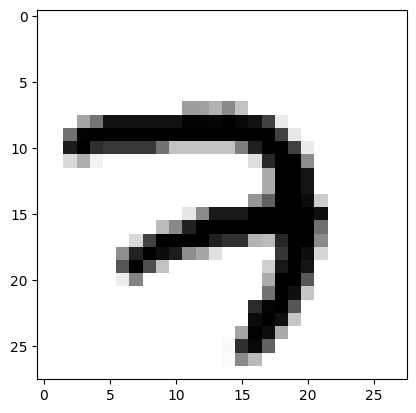

In [15]:
# lets view some data
plt.imshow(X_train[0],cmap='binary')
plt.show()

<Axes: >

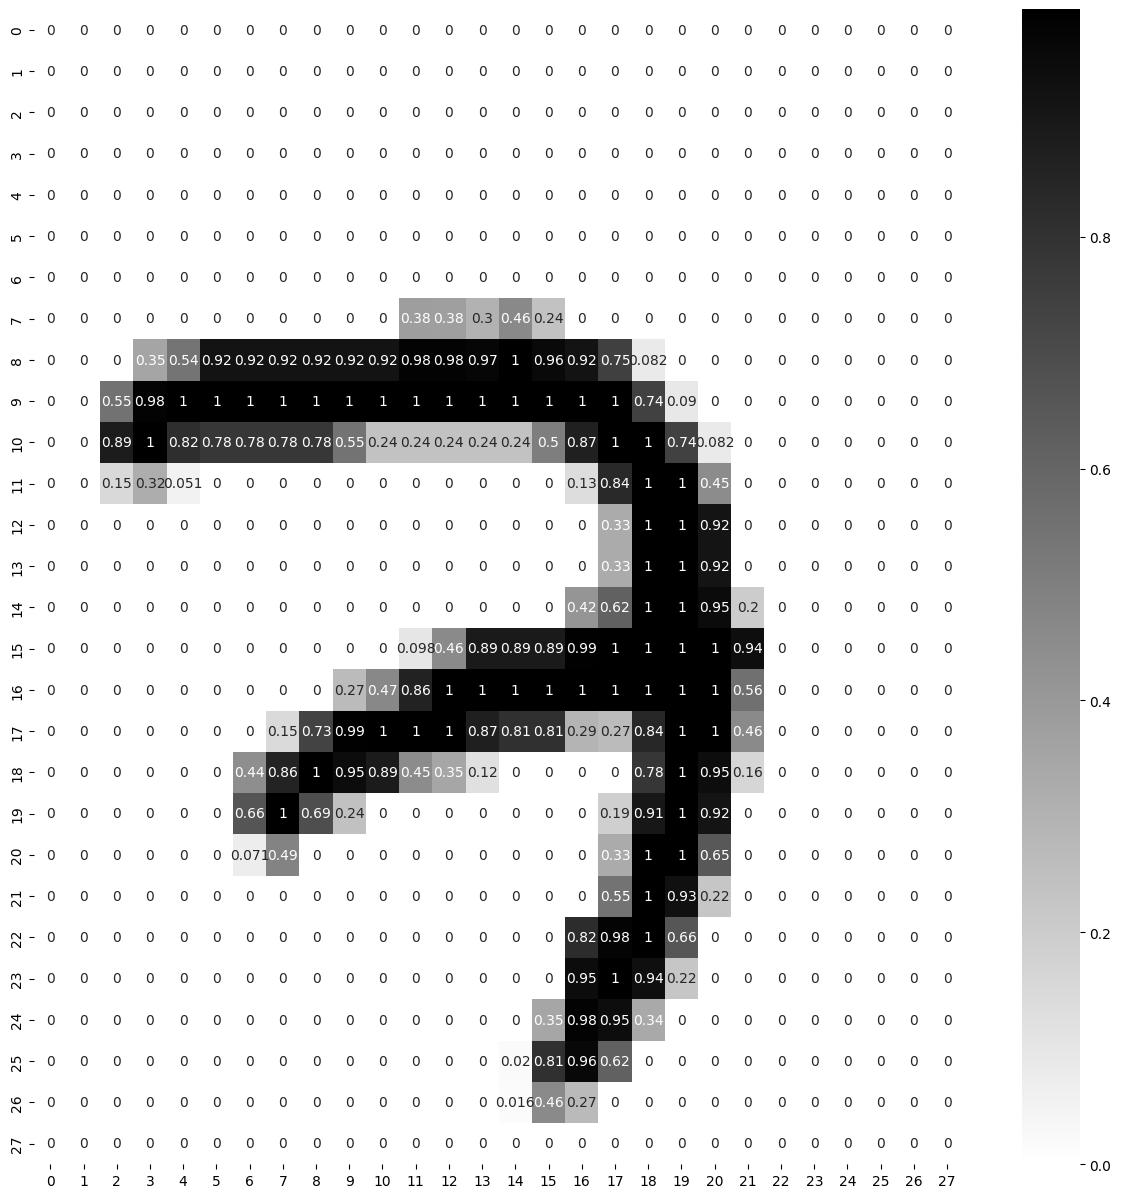

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [17]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout





In [18]:
# Creating Layers Of ANN

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1',kernel_regularizer=regularizers.L2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

model_clf=tf.keras.models.Sequential(LAYERS)

## Method 2

In [27]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

# define the model
model=Sequential()
model.add(Flatten(input_shape=[28,28],name='inputLayer'))
model.add(Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.1))
model.add(Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))

model.add(Dense(units=10,activation='softmax'))

784*64+64

In [20]:
784*64+64

50240

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [29]:
LOSS_FUNCTION ='sparse_categorical_crossentropy' # use=> tf.losses.sparse_categorical_crossentropy
OPTIMIZER='SGD' # or use with custom learning rate =>tf.keras.optimizers.SGD(0.02)
METRICS=['accuracy']

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [30]:
# training
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history =model.fit(X_train,y_train,epochs=EPOCHS,
                   validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2298 - accuracy: 0.5812 - val_loss: 0.4432 - val_accuracy: 0.8870
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6400 - accuracy: 0.8017 - val_loss: 0.3070 - val_accuracy: 0.9178
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5117 - accuracy: 0.8458 - val_loss: 0.2524 - val_accuracy: 0.9316
Epoch 4/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4474 - accuracy: 0.8678 - val_loss: 0.2228 - val_accuracy: 0.9424
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3999 - accuracy: 0.8851 - val_loss: 0.1992 - val_accuracy: 0.9460


In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.229820,0.581182,0.443191,0.8870
1,0.640009,0.801709,0.306995,0.9178
2,0.511685,0.845782,0.252420,0.9316
3,0.447364,0.867818,0.222834,0.9424
4,0.399863,0.885145,0.199191,0.9460


<Axes: >

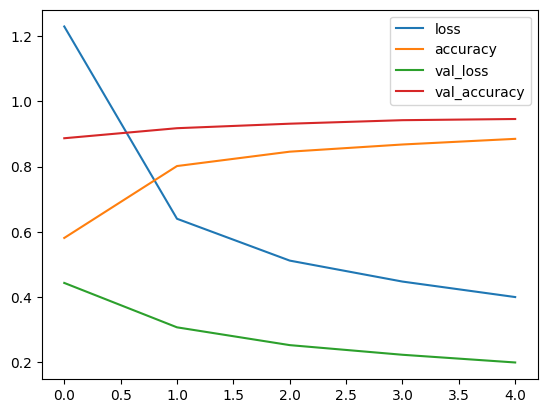

In [32]:
pd.DataFrame(history.history).plot()